In [ ]:
import scipy
import pandas as pd
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import networkx as nx
from fastconsensus.core import construct_sparse_consensus_matrix,threshold_matrix,triadic_closure,check_convergence,get_algorithm
import igraph as ig

%load_ext rpy2.ipython

In [ ]:
%%R

suppressPackageStartupMessages({
    library(cowplot)
    library(tidyverse)
    theme_set(theme_cowplot())
})

options(dplyr.width = Inf)

# Load Louvain clustering results
### Code already run separately in Peripheral/louvain_parameter_sweep.py

In [ ]:
louvain_gamma_range = np.arange(1, 1.51, 0.05)
louvain_sweep_res_list = []
for gamma_val in louvain_gamma_range:
    # Use string formatting to two decimal places
    gamma_val_str = "{:.2f}".format(gamma_val)
    louvain_modules = (pd.read_csv(f"{data_path}/Louvain_results/Louvain_Rubinov_assignments_100reps_gamma{gamma_val_str}.csv", header=None))

    # Sweep across each column and find the number of unique values
    num_modules_this_gamma = louvain_modules.apply(lambda x: len(x.unique()), axis=0)

    mean_num_modules = num_modules_this_gamma.mean()
    std_num_modules = num_modules_this_gamma.std()
    this_gamma_df = pd.DataFrame({'gamma_val': gamma_val, 'mean_num_modules': mean_num_modules, 'sd_num_modules': std_num_modules}, index=[0])
    louvain_sweep_res_list.append(this_gamma_df)

louvain_sweep_res_df = pd.concat(louvain_sweep_res_list, axis=0)

/Users/abry4213/anaconda3/envs/annie_env/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


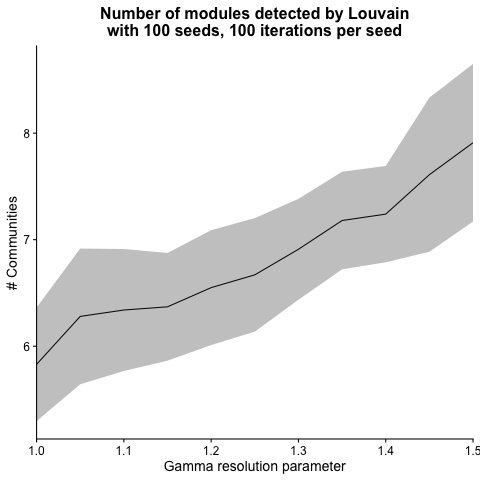

In [ ]:
%%R -i louvain_sweep_res_df

louvain_sweep_res_df %>%
    ggplot(data=., mapping=aes(x=gamma_val, y=mean_num_modules)) +
    geom_line() +
    geom_ribbon(aes(ymin=mean_num_modules-sd_num_modules, ymax=mean_num_modules+sd_num_modules), alpha=0.3) +
    scale_y_continuous(breaks = c(6,7,8)) +
    scale_x_continuous(expand=c(0,0)) +
    ylab("# Communities") +
    xlab("Gamma resolution parameter") +
    ggtitle("Number of modules detected by Louvain\nwith 100 seeds, 100 iterations per seed") +
    theme(plot.title = element_text(hjust=0.5))